# Eksplorasi Data Master KKM
## Analisis Data untuk Algoritma Genetika Pengelompokan

Notebook ini melakukan eksplorasi mendalam terhadap data master KKM untuk memahami karakteristik data yang akan digunakan dalam algoritma genetika pengelompokan.

### Objectives:
1. Memahami distribusi HTQ (Hai'ah Tahfizh Al-Qur'an)
2. Menganalisis distribusi gender dan fakultas
3. Mengidentifikasi potensi duplikasi jurusan
4. Menghitung distribusi ukuran kelompok optimal
5. Memberikan rekomendasi parameter GA

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. Load dan Overview Data

In [5]:
# Load data
df = pd.read_csv('../data/master_data.csv')

print("=== OVERVIEW DATA ===")
print(f"Total mahasiswa: {len(df)}")
print(f"Shape: {df.shape}")
print("\n=== INFO COLUMNS ===")
print(df.info())
print("\n=== FIRST 10 ROWS ===")
print(df.head(10))

=== OVERVIEW DATA ===
Total mahasiswa: 2338
Shape: (2338, 5)

=== INFO COLUMNS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Group     2338 non-null   int64 
 1   Gender    2338 non-null   object
 2   Fakultas  2338 non-null   object
 3   Jurusan   2338 non-null   object
 4   Htq       2338 non-null   object
dtypes: int64(1), object(4)
memory usage: 91.5+ KB
None

=== FIRST 10 ROWS ===
   Group Gender             Fakultas                    Jurusan    Htq
0      1     PR            HUMANIORA  BAHASA DAN SASTRA INGGRIS  Tidak
1      1     PR  SAINS DAN TEKNOLOGI                    BIOLOGI  Tidak
2      1     PR  SAINS DAN TEKNOLOGI         TEKNIK INFORMATIKA  Tidak
3      1     LK            HUMANIORA     BAHASA DAN SASTRA ARAB  Tidak
4      1     LK             SYARI'AH  ILMU AL-QUR`AN DAN TAFSIR  Tidak
5      1     PR             SYARI'AH   A

In [6]:
# Check for missing values
print("=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

=== MISSING VALUES ===
Group       0
Gender      0
Fakultas    0
Jurusan     0
Htq         0
dtype: int64

=== UNIQUE VALUES PER COLUMN ===
Group: 190 unique values
Gender: 2 unique values
Fakultas: 7 unique values
Jurusan: 24 unique values
Htq: 2 unique values


## 2. Analisis Distribusi HTQ (Constraint 1)

=== DISTRIBUSI HTQ ===
Htq
Tidak    2112
Ya        226
Name: count, dtype: int64

Persentase:
Htq
Tidak    90.333618
Ya        9.666382
Name: proportion, dtype: float64


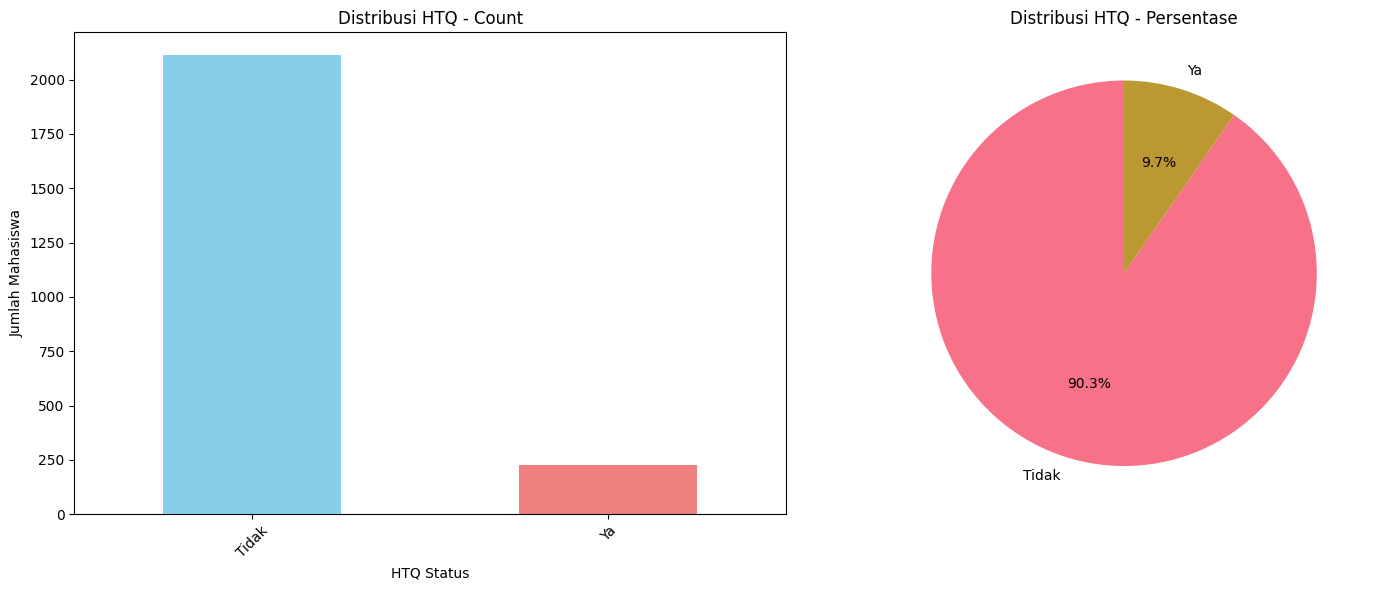

In [7]:
# Analisis HTQ distribution
print("=== DISTRIBUSI HTQ ===")
htq_counts = df['Htq'].value_counts()
print(htq_counts)
print("\nPersentase:")
print(df['Htq'].value_counts(normalize=True) * 100)

# Visualisasi HTQ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
htq_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Distribusi HTQ - Count')
ax1.set_xlabel('HTQ Status')
ax1.set_ylabel('Jumlah Mahasiswa')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(htq_counts.values, labels=htq_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribusi HTQ - Persentase')

plt.tight_layout()
plt.show()

In [8]:
# Analisis kebutuhan kelompok untuk HTQ
htq_ya_count = len(df[df['Htq'] == 'Ya'])
htq_tidak_count = len(df[df['Htq'] == 'Tidak'])

print(f"=== ANALISIS HTQ UNTUK PENGELOMPOKAN ===")
print(f"Mahasiswa HTQ 'Ya': {htq_ya_count}")
print(f"Mahasiswa HTQ 'Tidak': {htq_tidak_count}")
print(f"Ratio HTQ Ya/Total: {htq_ya_count/len(df):.3f}")
print(f"\nKetika dibagi ke kelompok:")
for num_groups in [150, 190, 200, 250]:
    coverage = min(htq_ya_count, num_groups)
    print(f"- {num_groups} kelompok: {coverage} kelompok dapat HTQ ({coverage/num_groups*100:.1f}%)")

=== ANALISIS HTQ UNTUK PENGELOMPOKAN ===
Mahasiswa HTQ 'Ya': 226
Mahasiswa HTQ 'Tidak': 2112
Ratio HTQ Ya/Total: 0.097

Ketika dibagi ke kelompok:
- 150 kelompok: 150 kelompok dapat HTQ (100.0%)
- 190 kelompok: 190 kelompok dapat HTQ (100.0%)
- 200 kelompok: 200 kelompok dapat HTQ (100.0%)
- 250 kelompok: 226 kelompok dapat HTQ (90.4%)


## 3. Analisis Distribusi Gender (Constraint 3)

=== DISTRIBUSI GENDER ===
Gender
PR    1391
LK     947
Name: count, dtype: int64

Persentase:
Gender
PR    59.495295
LK    40.504705
Name: proportion, dtype: float64


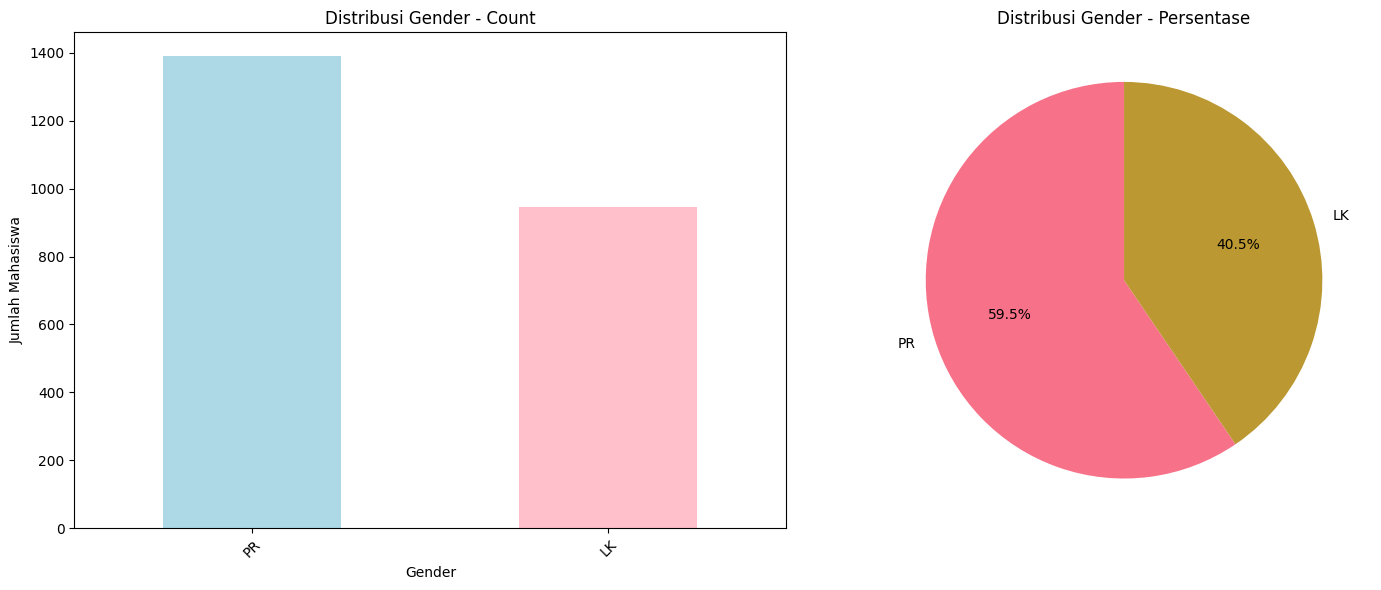

In [9]:
# Analisis Gender distribution
print("=== DISTRIBUSI GENDER ===")
gender_counts = df['Gender'].value_counts()
print(gender_counts)
print("\nPersentase:")
gender_pct = df['Gender'].value_counts(normalize=True) * 100
print(gender_pct)

# Visualisasi Gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
gender_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'pink'])
ax1.set_title('Distribusi Gender - Count')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Jumlah Mahasiswa')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribusi Gender - Persentase')

plt.tight_layout()
plt.show()

In [10]:
# Analisis gender balance untuk kelompok
total_lk = len(df[df['Gender'] == 'LK'])
total_pr = len(df[df['Gender'] == 'PR'])
global_ratio_lk = total_lk / len(df)
global_ratio_pr = total_pr / len(df)

print(f"=== ANALISIS GENDER BALANCE UNTUK PENGELOMPOKAN ===")
print(f"Total LK: {total_lk}")
print(f"Total PR: {total_pr}")
print(f"Global ratio LK: {global_ratio_lk:.3f}")
print(f"Global ratio PR: {global_ratio_pr:.3f}")

print(f"\nSimulasi target gender per kelompok:")
for num_groups in [150, 190, 200, 250]:
    avg_size = len(df) / num_groups
    target_lk = avg_size * global_ratio_lk
    target_pr = avg_size * global_ratio_pr
    print(f"- {num_groups} kelompok (avg size {avg_size:.1f}):")
    print(f"  Target LK per kelompok: {target_lk:.1f} (range: {int(target_lk-1)}-{int(target_lk+1)})")
    print(f"  Target PR per kelompok: {target_pr:.1f} (range: {int(target_pr-1)}-{int(target_pr+1)})")

=== ANALISIS GENDER BALANCE UNTUK PENGELOMPOKAN ===
Total LK: 947
Total PR: 1391
Global ratio LK: 0.405
Global ratio PR: 0.595

Simulasi target gender per kelompok:
- 150 kelompok (avg size 15.6):
  Target LK per kelompok: 6.3 (range: 5-7)
  Target PR per kelompok: 9.3 (range: 8-10)
- 190 kelompok (avg size 12.3):
  Target LK per kelompok: 5.0 (range: 3-5)
  Target PR per kelompok: 7.3 (range: 6-8)
- 200 kelompok (avg size 11.7):
  Target LK per kelompok: 4.7 (range: 3-5)
  Target PR per kelompok: 7.0 (range: 5-7)
- 250 kelompok (avg size 9.4):
  Target LK per kelompok: 3.8 (range: 2-4)
  Target PR per kelompok: 5.6 (range: 4-6)


## 4. Analisis Distribusi Fakultas

=== DISTRIBUSI FAKULTAS ===
Fakultas
SAINS DAN TEKNOLOGI                   645
SYARI'AH                              558
EKONOMI                               510
HUMANIORA                             367
PSIKOLOGI                             218
ILMU TARBIYAH DAN KEGURUAN             38
KEDOKTERAN DAN ILMU-ILMU KESEHATAN      2
Name: count, dtype: int64

Persentase:
Fakultas
SAINS DAN TEKNOLOGI                   27.587682
SYARI'AH                              23.866553
EKONOMI                               21.813516
HUMANIORA                             15.697177
PSIKOLOGI                              9.324209
ILMU TARBIYAH DAN KEGURUAN             1.625321
KEDOKTERAN DAN ILMU-ILMU KESEHATAN     0.085543
Name: proportion, dtype: float64


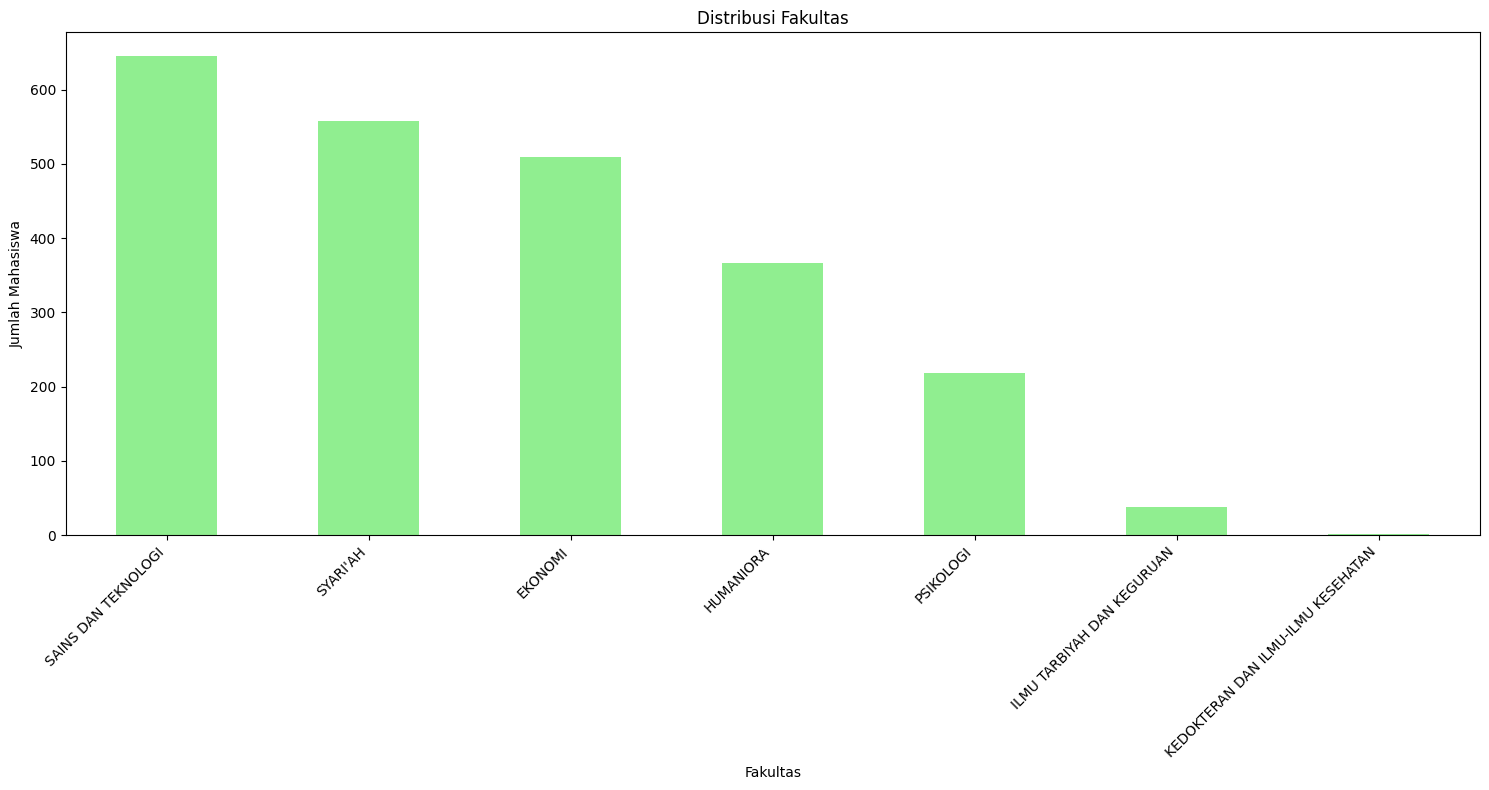

In [11]:
# Analisis Fakultas distribution
print("=== DISTRIBUSI FAKULTAS ===")
fakultas_counts = df['Fakultas'].value_counts()
print(fakultas_counts)
print("\nPersentase:")
print(df['Fakultas'].value_counts(normalize=True) * 100)

# Visualisasi Fakultas
plt.figure(figsize=(15, 8))
fakultas_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Fakultas')
plt.xlabel('Fakultas')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Analisis Distribusi Jurusan (Constraint 2)

In [12]:
# Analisis Jurusan distribution
print("=== DISTRIBUSI JURUSAN ===")
jurusan_counts = df['Jurusan'].value_counts()
print(f"Total jurusan unik: {len(jurusan_counts)}")
print("\nTop 15 jurusan terbanyak:")
print(jurusan_counts.head(15))
print("\nBottom 10 jurusan tersedikit:")
print(jurusan_counts.tail(10))

=== DISTRIBUSI JURUSAN ===
Total jurusan unik: 24

Top 15 jurusan terbanyak:
Jurusan
MANAJEMEN                          248
PSIKOLOGI                          218
BAHASA DAN SASTRA ARAB             184
BAHASA DAN SASTRA INGGRIS          183
HUKUM BISNIS SYARI'AH              177
AL-AHWAL AL-SYAKHSHIYYAH           169
TEKNIK INFORMATIKA                 160
AKUNTANSI                          137
PERBANKAN SYARI`AH                 125
BIOLOGI                            118
ILMU AL-QUR`AN DAN TAFSIR          118
TEKNIK ARSITEKTUR                  109
MATEMATIKA                          96
HUKUM TATA NEGARA                   94
PERPUSTAKAAN DAN ILMU INFORMASI     73
Name: count, dtype: int64

Bottom 10 jurusan tersedikit:
Jurusan
PERPUSTAKAAN DAN ILMU INFORMASI        73
FISIKA                                 48
KIMIA                                  41
TADRIS MATEMATIKA                      17
PENDIDIKAN GURU MADRASAH IBTIDAIYAH     7
PENDIDIKAN AGAMA ISLAM                  6
PENDIDIKAN IL

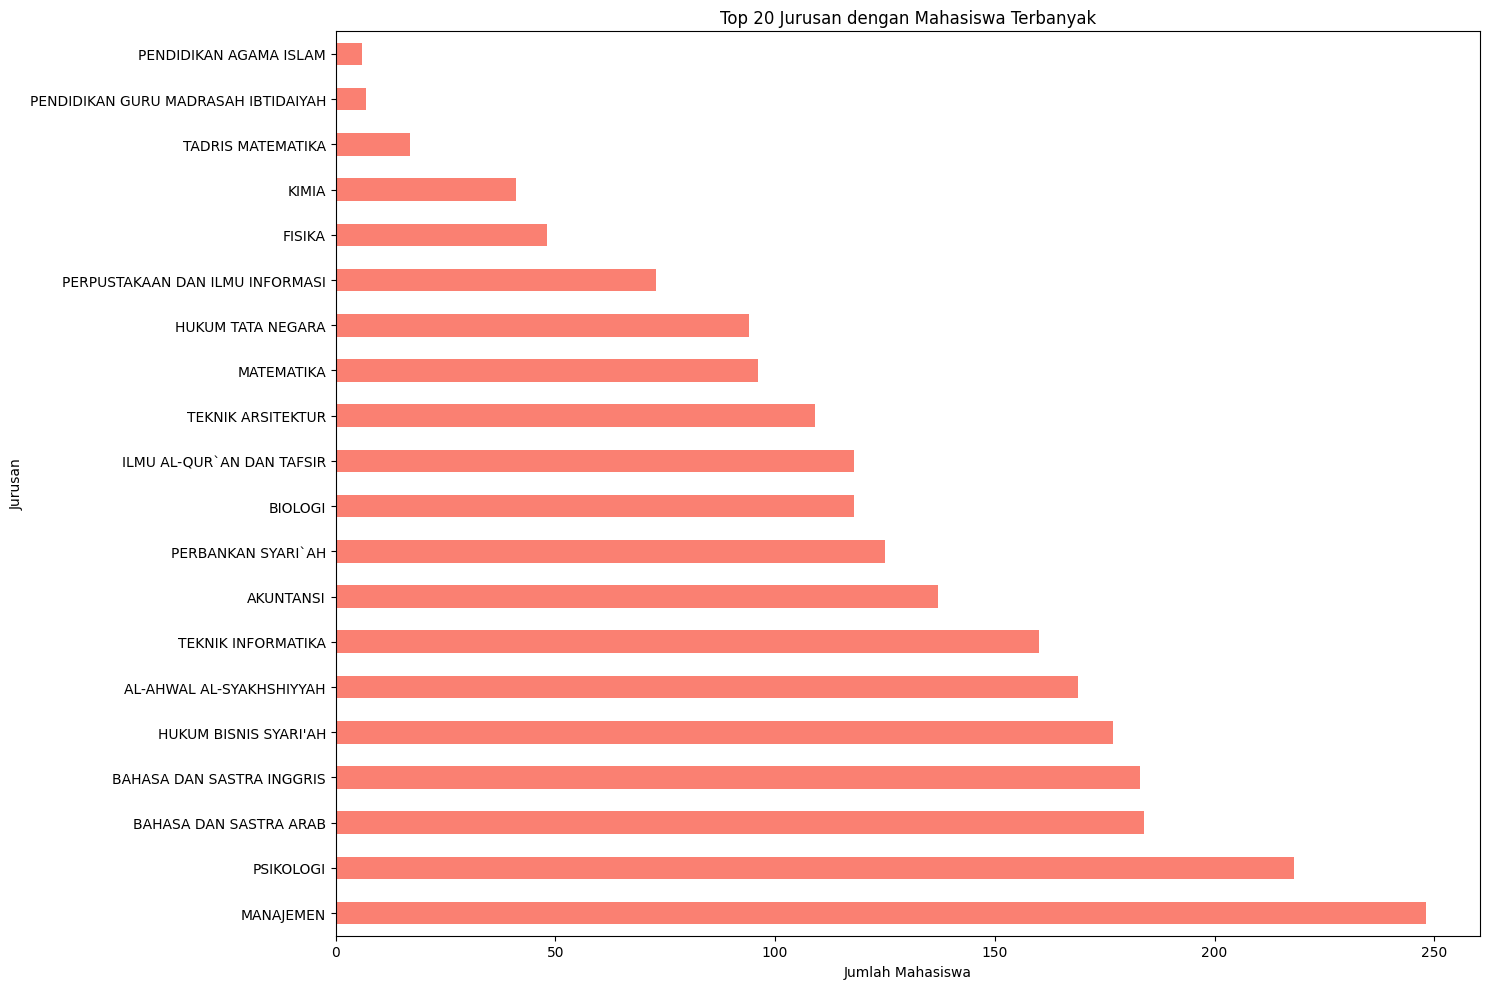

In [13]:
# Visualisasi Top 20 Jurusan
plt.figure(figsize=(15, 10))
top_20_jurusan = jurusan_counts.head(20)
top_20_jurusan.plot(kind='barh', color='salmon')
plt.title('Top 20 Jurusan dengan Mahasiswa Terbanyak')
plt.xlabel('Jumlah Mahasiswa')
plt.ylabel('Jurusan')
plt.tight_layout()
plt.show()

In [14]:
# Analisis potensi duplikasi jurusan
print("=== ANALISIS DUPLIKASI JURUSAN ===")
print("Distribusi jumlah mahasiswa per jurusan:")
jurusan_size_dist = jurusan_counts.value_counts().sort_index()
print(jurusan_size_dist)

# Hitung potensi duplikasi
high_duplication_risk = jurusan_counts[jurusan_counts >= 10]
print(f"\nJurusan dengan risiko duplikasi tinggi (≥10 mahasiswa): {len(high_duplication_risk)}")
print(f"Total mahasiswa dalam jurusan berisiko: {high_duplication_risk.sum()}")
print(f"Persentase mahasiswa berisiko: {high_duplication_risk.sum()/len(df)*100:.1f}%")

print("\nJurusan dengan mahasiswa terbanyak (potensi duplikasi tertinggi):")
for jurusan, count in high_duplication_risk.head(10).items():
    print(f"- {jurusan}: {count} mahasiswa")

=== ANALISIS DUPLIKASI JURUSAN ===
Distribusi jumlah mahasiswa per jurusan:
count
1      1
2      2
5      1
6      1
7      1
17     1
41     1
48     1
73     1
94     1
96     1
109    1
118    2
125    1
137    1
160    1
169    1
177    1
183    1
184    1
218    1
248    1
Name: count, dtype: int64

Jurusan dengan risiko duplikasi tinggi (≥10 mahasiswa): 18
Total mahasiswa dalam jurusan berisiko: 2315
Persentase mahasiswa berisiko: 99.0%

Jurusan dengan mahasiswa terbanyak (potensi duplikasi tertinggi):
- MANAJEMEN: 248 mahasiswa
- PSIKOLOGI: 218 mahasiswa
- BAHASA DAN SASTRA ARAB: 184 mahasiswa
- BAHASA DAN SASTRA INGGRIS: 183 mahasiswa
- HUKUM BISNIS SYARI'AH: 177 mahasiswa
- AL-AHWAL AL-SYAKHSHIYYAH: 169 mahasiswa
- TEKNIK INFORMATIKA: 160 mahasiswa
- AKUNTANSI: 137 mahasiswa
- PERBANKAN SYARI`AH: 125 mahasiswa
- BIOLOGI: 118 mahasiswa


## 6. Analisis Ukuran Kelompok Optimal (Constraint 4)

In [15]:
# Simulasi berbagai skenario jumlah kelompok
total_mahasiswa = len(df)
print(f"=== ANALISIS UKURAN KELOMPOK OPTIMAL ===")
print(f"Total mahasiswa: {total_mahasiswa}")

group_scenarios = []
for num_groups in range(100, 301, 10):
    avg_size = total_mahasiswa / num_groups
    min_size = int(avg_size)
    max_size = int(avg_size) + 1
    
    # Hitung distribusi kelompok dengan min dan max size
    remainder = total_mahasiswa % num_groups
    groups_max_size = remainder
    groups_min_size = num_groups - remainder
    
    scenario = {
        'num_groups': num_groups,
        'avg_size': avg_size,
        'min_size': min_size,
        'max_size': max_size,
        'groups_min_size': groups_min_size,
        'groups_max_size': groups_max_size,
        'size_variance': max_size - min_size
    }
    group_scenarios.append(scenario)

# Show some key scenarios
print("\nBeberapa skenario jumlah kelompok:")
for scenario in [s for s in group_scenarios if s['num_groups'] % 50 == 0 or s['num_groups'] in [190, 200]]:
    print(f"\n{scenario['num_groups']} kelompok:")
    print(f"  - Rata-rata ukuran: {scenario['avg_size']:.1f}")
    print(f"  - {scenario['groups_min_size']} kelompok berukuran {scenario['min_size']}")
    print(f"  - {scenario['groups_max_size']} kelompok berukuran {scenario['max_size']}")
    print(f"  - Variansi ukuran: {scenario['size_variance']}")

=== ANALISIS UKURAN KELOMPOK OPTIMAL ===
Total mahasiswa: 2338

Beberapa skenario jumlah kelompok:

100 kelompok:
  - Rata-rata ukuran: 23.4
  - 62 kelompok berukuran 23
  - 38 kelompok berukuran 24
  - Variansi ukuran: 1

150 kelompok:
  - Rata-rata ukuran: 15.6
  - 62 kelompok berukuran 15
  - 88 kelompok berukuran 16
  - Variansi ukuran: 1

190 kelompok:
  - Rata-rata ukuran: 12.3
  - 132 kelompok berukuran 12
  - 58 kelompok berukuran 13
  - Variansi ukuran: 1

200 kelompok:
  - Rata-rata ukuran: 11.7
  - 62 kelompok berukuran 11
  - 138 kelompok berukuran 12
  - Variansi ukuran: 1

250 kelompok:
  - Rata-rata ukuran: 9.4
  - 162 kelompok berukuran 9
  - 88 kelompok berukuran 10
  - Variansi ukuran: 1

300 kelompok:
  - Rata-rata ukuran: 7.8
  - 62 kelompok berukuran 7
  - 238 kelompok berukuran 8
  - Variansi ukuran: 1


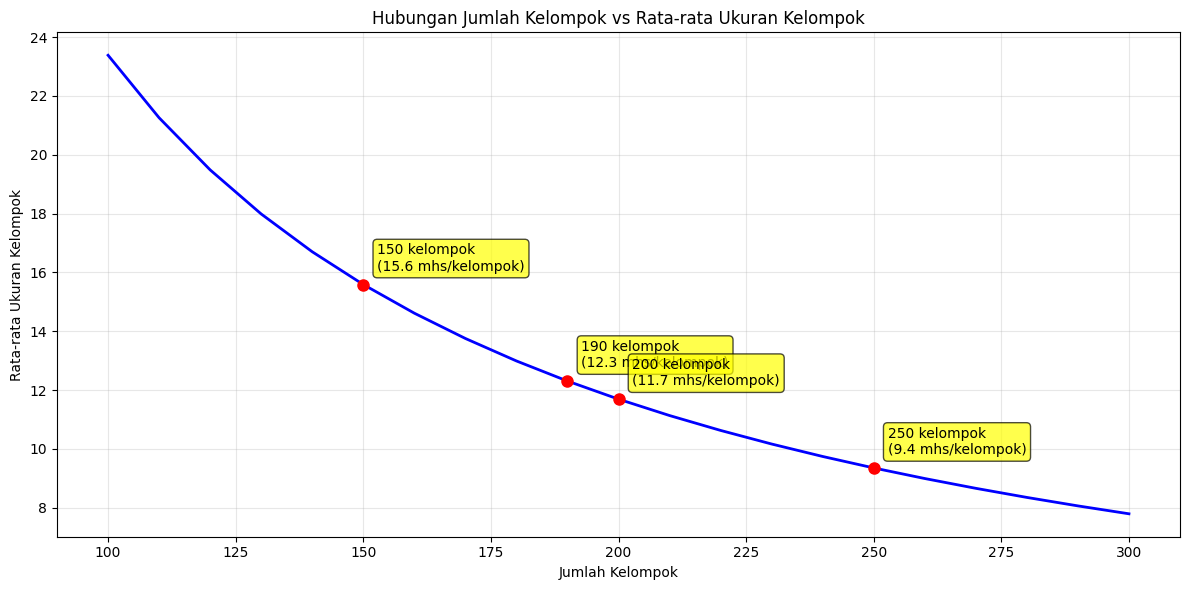

In [16]:
# Visualisasi ukuran kelompok vs jumlah kelompok
num_groups_list = [s['num_groups'] for s in group_scenarios]
avg_sizes = [s['avg_size'] for s in group_scenarios]

plt.figure(figsize=(12, 6))
plt.plot(num_groups_list, avg_sizes, 'b-', linewidth=2)
plt.xlabel('Jumlah Kelompok')
plt.ylabel('Rata-rata Ukuran Kelompok')
plt.title('Hubungan Jumlah Kelompok vs Rata-rata Ukuran Kelompok')
plt.grid(True, alpha=0.3)

# Highlight beberapa skenario menarik
highlights = [150, 190, 200, 250]
for highlight in highlights:
    if highlight in num_groups_list:
        idx = num_groups_list.index(highlight)
        plt.plot(highlight, avg_sizes[idx], 'ro', markersize=8)
        plt.annotate(f'{highlight} kelompok\n({avg_sizes[idx]:.1f} mhs/kelompok)', 
                    (highlight, avg_sizes[idx]), 
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

## 7. Analisis Kombinasi Gender-HTQ

=== ANALISIS KOMBINASI GENDER-HTQ ===
Count:
Htq     Tidak   Ya   All
Gender                  
LK        869   78   947
PR       1243  148  1391
All      2112  226  2338

Persentase:
Htq         Tidak        Ya
Gender                     
LK      37.168520  3.336185
PR      53.165098  6.330197


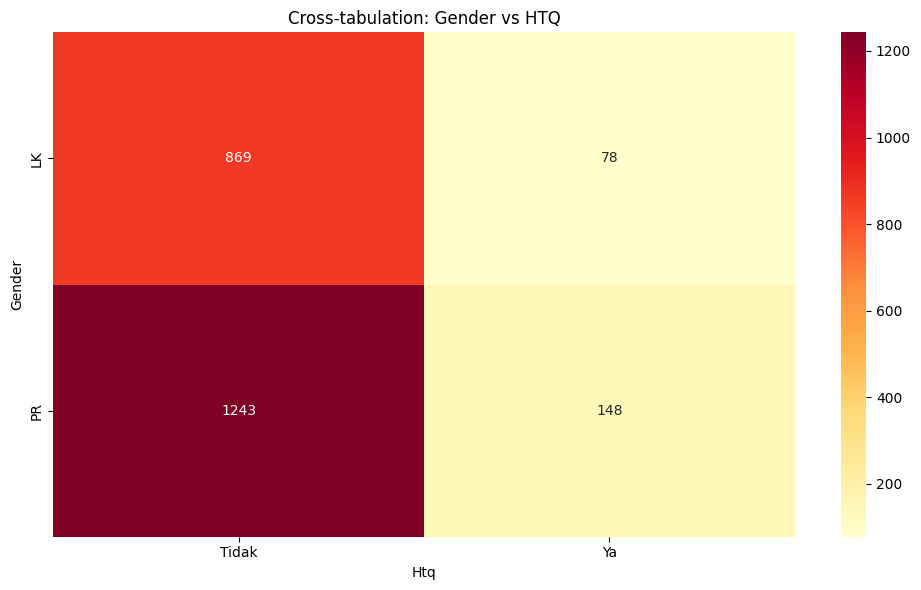

In [17]:
# Cross-tabulation Gender vs HTQ
print("=== ANALISIS KOMBINASI GENDER-HTQ ===")
gender_htq_crosstab = pd.crosstab(df['Gender'], df['Htq'], margins=True)
print("Count:")
print(gender_htq_crosstab)

print("\nPersentase:")
gender_htq_pct = pd.crosstab(df['Gender'], df['Htq'], normalize='all') * 100
print(gender_htq_pct)

# Visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gender_htq_crosstab.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd')
plt.title('Cross-tabulation: Gender vs HTQ')
plt.tight_layout()
plt.show()

## 8. Analisis Fakultas-Jurusan

=== ANALISIS FAKULTAS-JURUSAN ===
                             Fakultas  Total_Mahasiswa  Jumlah_Jurusan  \
5                 SAINS DAN TEKNOLOGI              645               7   
6                            SYARI'AH              558               4   
0                             EKONOMI              510               3   
1                           HUMANIORA              367               2   
4                           PSIKOLOGI              218               1   
2          ILMU TARBIYAH DAN KEGURUAN               38               6   
3  KEDOKTERAN DAN ILMU-ILMU KESEHATAN                2               1   

   Rata_Mahasiswa_per_Jurusan  
5                   92.142857  
6                  139.500000  
0                  170.000000  
1                  183.500000  
4                  218.000000  
2                    6.333333  
3                    2.000000  


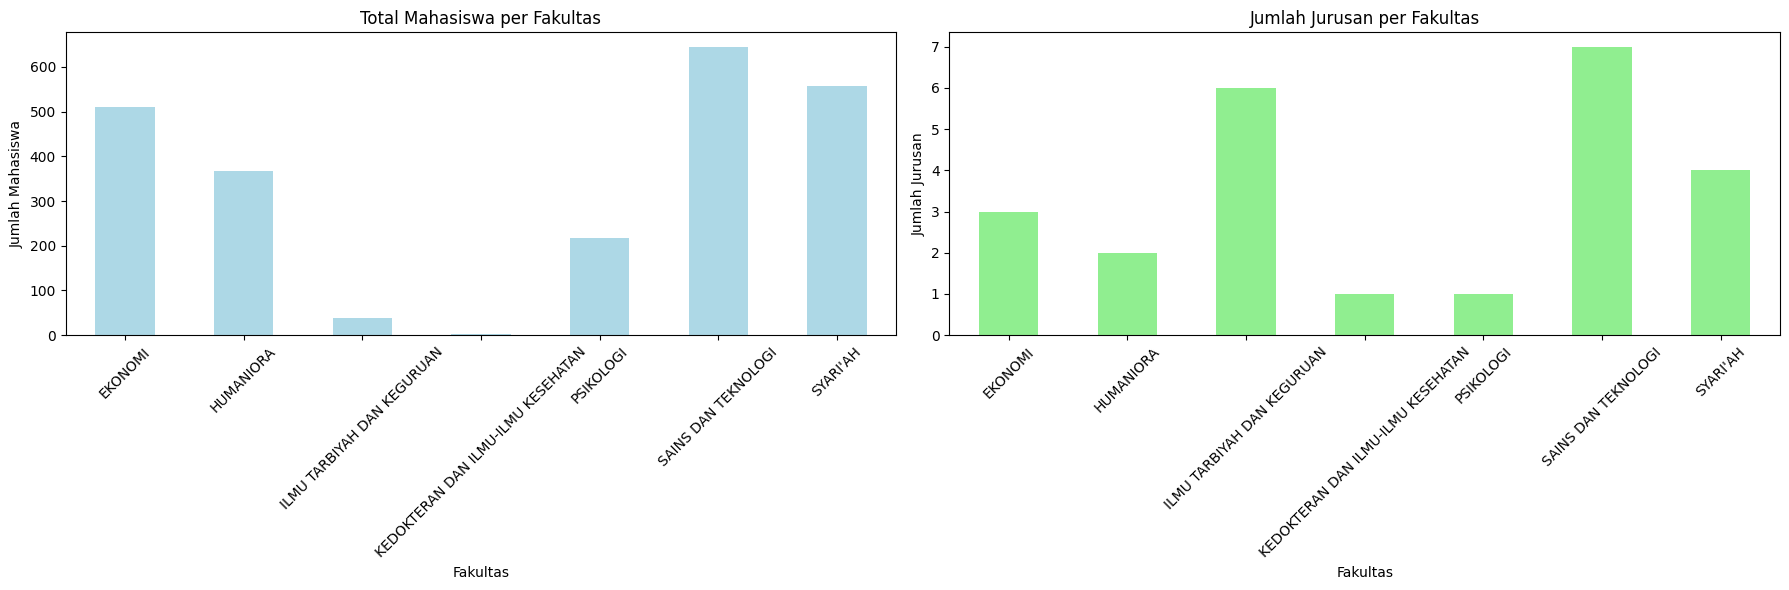

In [18]:
# Analisis jurusan per fakultas
print("=== ANALISIS FAKULTAS-JURUSAN ===")
fakultas_jurusan = df.groupby('Fakultas')['Jurusan'].agg(['count', 'nunique']).reset_index()
fakultas_jurusan.columns = ['Fakultas', 'Total_Mahasiswa', 'Jumlah_Jurusan']
fakultas_jurusan['Rata_Mahasiswa_per_Jurusan'] = fakultas_jurusan['Total_Mahasiswa'] / fakultas_jurusan['Jumlah_Jurusan']

print(fakultas_jurusan.sort_values('Total_Mahasiswa', ascending=False))

# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Jumlah mahasiswa per fakultas
fakultas_jurusan.set_index('Fakultas')['Total_Mahasiswa'].plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Total Mahasiswa per Fakultas')
ax1.set_ylabel('Jumlah Mahasiswa')
ax1.tick_params(axis='x', rotation=45)

# Jumlah jurusan per fakultas
fakultas_jurusan.set_index('Fakultas')['Jumlah_Jurusan'].plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Jumlah Jurusan per Fakultas')
ax2.set_ylabel('Jumlah Jurusan')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Rekomendasi Parameter GA

In [19]:
print("=== REKOMENDASI PARAMETER ALGORITMA GENETIKA ===")
print("\nBerdasarkan analisis data:")
print(f"\n1. JUMLAH KELOMPOK:")
print(f"   - Rekomendasi: 190-200 kelompok")
print(f"   - Alasan: Ukuran kelompok optimal 11-12 mahasiswa")

print(f"\n2. CONSTRAINT WEIGHTS:")
print(f"   - HTQ (30%): {htq_ya_count} mahasiswa HTQ untuk {190} kelompok")
print(f"   - Duplikasi (20%): {len(high_duplication_risk)} jurusan berisiko duplikasi")
print(f"   - Gender (20%): Ratio LK:PR = {global_ratio_lk:.2f}:{global_ratio_pr:.2f}")
print(f"   - Ukuran (30%): Variansi ukuran minimal dengan 190-200 kelompok")

print(f"\n3. PARAMETER GA:")
print(f"   - Population size: 150-200 (proporsi dengan kompleksitas)")
print(f"   - Max generation: 1000-2000 (dataset besar)")
print(f"   - Crossover rate: 0.7-0.8")
print(f"   - Mutation rate: 0.1-0.15")
print(f"   - Selection: Tournament (balance exploration-exploitation)")

print(f"\n4. TARGET PERFORMANCE:")
print(f"   - Target fitness: 0.90-0.95")
print(f"   - Stagnation limit: 100-200 generations")

print(f"\n5. KENDALA UTAMA:")
print(f"   - HTQ terbatas: hanya {htq_ya_count} mahasiswa untuk {190} kelompok")
print(f"   - Duplikasi jurusan: {len(high_duplication_risk)} jurusan berisiko")
print(f"   - Balance gender: perlu strategi khusus untuk LK-PR balance")

=== REKOMENDASI PARAMETER ALGORITMA GENETIKA ===

Berdasarkan analisis data:

1. JUMLAH KELOMPOK:
   - Rekomendasi: 190-200 kelompok
   - Alasan: Ukuran kelompok optimal 11-12 mahasiswa

2. CONSTRAINT WEIGHTS:
   - HTQ (30%): 226 mahasiswa HTQ untuk 190 kelompok
   - Duplikasi (20%): 18 jurusan berisiko duplikasi
   - Gender (20%): Ratio LK:PR = 0.41:0.59
   - Ukuran (30%): Variansi ukuran minimal dengan 190-200 kelompok

3. PARAMETER GA:
   - Population size: 150-200 (proporsi dengan kompleksitas)
   - Max generation: 1000-2000 (dataset besar)
   - Crossover rate: 0.7-0.8
   - Mutation rate: 0.1-0.15
   - Selection: Tournament (balance exploration-exploitation)

4. TARGET PERFORMANCE:
   - Target fitness: 0.90-0.95
   - Stagnation limit: 100-200 generations

5. KENDALA UTAMA:
   - HTQ terbatas: hanya 226 mahasiswa untuk 190 kelompok
   - Duplikasi jurusan: 18 jurusan berisiko
   - Balance gender: perlu strategi khusus untuk LK-PR balance


## 10. Summary dan Kesimpulan

In [20]:
print("=== SUMMARY EKSPLORASI DATA ===")
print(f"\nDATASET CHARACTERISTICS:")
print(f"- Total mahasiswa: {len(df)}")
print(f"- Fakultas: {df['Fakultas'].nunique()} unique")
print(f"- Jurusan: {df['Jurusan'].nunique()} unique")
print(f"- HTQ 'Ya': {htq_ya_count} ({htq_ya_count/len(df)*100:.1f}%)")
print(f"- HTQ 'Tidak': {htq_tidak_count} ({htq_tidak_count/len(df)*100:.1f}%)")
print(f"- Gender LK: {total_lk} ({total_lk/len(df)*100:.1f}%)")
print(f"- Gender PR: {total_pr} ({total_pr/len(df)*100:.1f}%)")

print(f"\nCHALLENGES UNTUK GA:")
print(f"- HTQ constraint: Sangat terbatas, hanya {htq_ya_count} untuk {190} kelompok")
print(f"- Duplikasi constraint: {len(high_duplication_risk)} jurusan berisiko tinggi")
print(f"- Gender balance: Perlu distribusi proporsional LK:PR")
print(f"- Size constraint: Relatif mudah dengan variance rendah")

print(f"\nRECOMMENDED CONFIGURATION:")
recommended_config = {
    'num_groups': 190,
    'population_size': 150,
    'max_generation': 1000,
    'crossover_rate': 0.8,
    'mutation_rate': 0.15,
    'selection_method': 'tournament',
    'weight_htq': 0.30,
    'weight_duplikasi': 0.20,
    'weight_gender': 0.20,
    'weight_jumlah': 0.30,
    'target_fitness': 0.90,
    'stagnation_limit': 150
}

print("\nRecommended Parameters:")
for key, value in recommended_config.items():
    print(f"  {key}: {value}")

=== SUMMARY EKSPLORASI DATA ===

DATASET CHARACTERISTICS:
- Total mahasiswa: 2338
- Fakultas: 7 unique
- Jurusan: 24 unique
- HTQ 'Ya': 226 (9.7%)
- HTQ 'Tidak': 2112 (90.3%)
- Gender LK: 947 (40.5%)
- Gender PR: 1391 (59.5%)

CHALLENGES UNTUK GA:
- HTQ constraint: Sangat terbatas, hanya 226 untuk 190 kelompok
- Duplikasi constraint: 18 jurusan berisiko tinggi
- Gender balance: Perlu distribusi proporsional LK:PR
- Size constraint: Relatif mudah dengan variance rendah

RECOMMENDED CONFIGURATION:

Recommended Parameters:
  num_groups: 190
  population_size: 150
  max_generation: 1000
  crossover_rate: 0.8
  mutation_rate: 0.15
  selection_method: tournament
  weight_htq: 0.3
  weight_duplikasi: 0.2
  weight_gender: 0.2
  weight_jumlah: 0.3
  target_fitness: 0.9
  stagnation_limit: 150
